In [1]:
# Todo:
# Missing values - drop method, imputation, calculate weight from height and BMI
# Detail on different imputation techniques
# Outlier detection and possible elimination
# Checking dataset label balance
# Data transformation -> normalization, standardization and all techniques associated with it
# Label encoding categorical variables where required
# PCA
# LDA
# General EDA

In [2]:
# Datasets so far
# absent_train ==> just importing the file, fixing formats, converting variable names and doing other mandatory conversions
# target or y ==> label for classification (converted)
# continuous_target ==> labels for regression
# X ==> unnecessary columns dropped, target dropped
# X_drop ==> outliers and NAs dropped [equivalent - y_drop]
# X_scaled ==> Original X + scaling
# X_drop_scaled ==> Original X + drop + scaling [[equivalent - y_drop]]
# X_imputed_scaled ==> Original X + outliers and NAs imputed + scaled

In [3]:
import pandas as pd
# import the csv file 
input_file = "C:/Users/anchi/Notebooks/Project/Absenteeism_at_work_train.csv"
absent_train = pd.read_csv(input_file)

In [4]:
absent_train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90.0,172,30,2


In [5]:
absent_train.shape

(666, 21)

In [6]:
absent_train.describe()
# TODO: check out workload avg, age

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
absent_train.info()
# Age, Workload avg need to be converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    object 
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [8]:
# relabelling columns for easy access
absent_train.columns = absent_train.columns.str.replace(' ', '_')
absent_train.columns = absent_train.columns.str.rstrip('_')
print(absent_train.columns)

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


In [9]:
# converting workload avg to int
absent_train['Work_load_Average/day'] = absent_train['Work_load_Average/day'].str.split(',').str.join('').astype(float)

In [10]:
absent_train['Work_load_Average/day']

0      239554.0
1      239554.0
2      239554.0
3      239554.0
4      239554.0
         ...   
661    246288.0
662    246288.0
663    246288.0
664    246288.0
665    246288.0
Name: Work_load_Average/day, Length: 666, dtype: float64

In [11]:
# converting age to int
# The command fails as we have a filed labelled 'R'
# So, for now, lets label R as 0
absent_train['Age'] = absent_train['Age'].replace(['R'],'0')
absent_train['Age'] = absent_train['Age'].astype(str).astype(int)

In [12]:
absent_train.info()
# columns have been converted to appropriate types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason_for_absence               666 non-null    int64  
 2   Month_of_absence                 666 non-null    int64  
 3   Day_of_the_week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation_expense           666 non-null    int64  
 6   Distance_from_Residence_to_Work  666 non-null    int64  
 7   Service_time                     666 non-null    int64  
 8   Age                              666 non-null    int32  
 9   Work_load_Average/day            666 non-null    float64
 10  Hit_target                       665 non-null    float64
 11  Disciplinary_failure             666 non-null    int64  
 12  Education             

In [13]:
absent_train.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,...,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,36.297297,272636.885886,...,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,6.661655,42957.873835,...,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [14]:
# converting target variable for classification
unaltered_df = absent_train.copy(deep=True)
ones = (absent_train.Absenteeism_time_in_hours > 0) & (absent_train.Absenteeism_time_in_hours <= 6)
twos = absent_train.Absenteeism_time_in_hours > 6
absent_train.loc[ones,'Absenteeism_time_in_hours'] = 1
absent_train.loc[twos,'Absenteeism_time_in_hours'] = 2
absent_train['Absenteeism_time_in_hours'].unique()

array([1, 0, 2], dtype=int64)

In [15]:
continuous_target = unaltered_df['Absenteeism_time_in_hours']
continuous_target

0      4
1      0
2      2
3      4
4      2
      ..
661    2
662    3
663    2
664    2
665    8
Name: Absenteeism_time_in_hours, Length: 666, dtype: int64

In [16]:
# Dropping column ID because it is not a predictor and setting target
target = absent_train['Absenteeism_time_in_hours']
y = target
X = absent_train.drop(['ID','Absenteeism_time_in_hours'],axis=1)

In [17]:
X.describe()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000
mean,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,36.297297,272636.885886,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315
std,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,6.661655,42957.873835,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081
min,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244387.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000
50%,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000
75%,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000


In [18]:
y.unique()

array([1, 0, 2], dtype=int64)

In [19]:
y.value_counts()/y.shape
# The dataset is imbalanced to a certain extent.
# Label 0 accounts for only 5% of the cases

1    0.579580
2    0.364865
0    0.055556
Name: Absenteeism_time_in_hours, dtype: float64

In [20]:
# Now, let's check for undetected NAs
absent_train.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         1
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             2
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

<AxesSubplot:xlabel='Work_load_Average/day'>

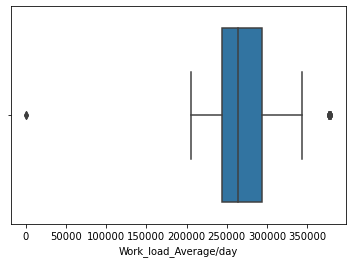

In [21]:
# columns Hit_target and Weight have missing values.
# Let's detect outliers simultaneously
import seaborn as sns
sns.boxplot(x=X['Work_load_Average/day'])

<AxesSubplot:xlabel='Transportation_expense'>

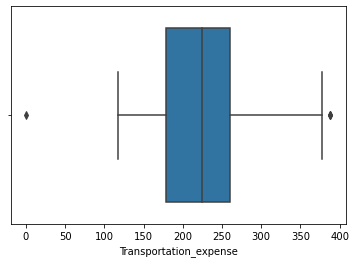

In [22]:
sns.boxplot(x=X['Transportation_expense'])

<AxesSubplot:xlabel='Distance_from_Residence_to_Work'>

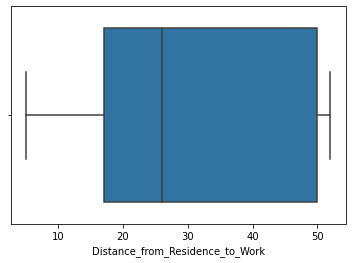

In [23]:
sns.boxplot(x=X['Distance_from_Residence_to_Work'])

<AxesSubplot:xlabel='Age'>

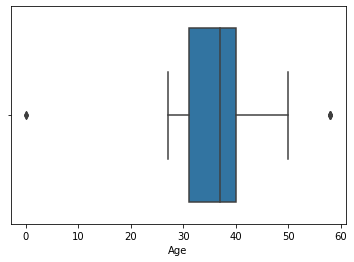

In [24]:
sns.boxplot(x=X['Age'])

<AxesSubplot:xlabel='Hit_target'>

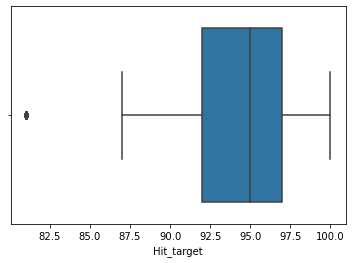

In [25]:
sns.boxplot(x=X['Hit_target'])

<AxesSubplot:xlabel='Weight'>

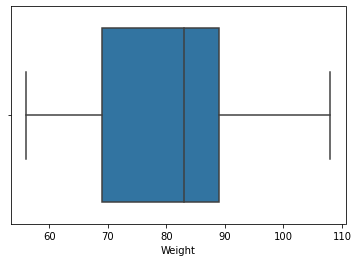

In [26]:
sns.boxplot(x=X['Weight'])

<AxesSubplot:xlabel='Height'>

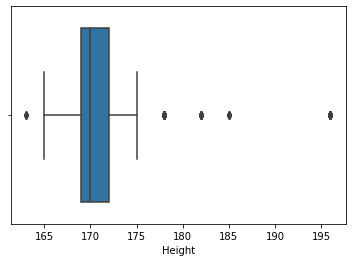

In [27]:
sns.boxplot(x=X['Height'])

<AxesSubplot:xlabel='Body_mass_index'>

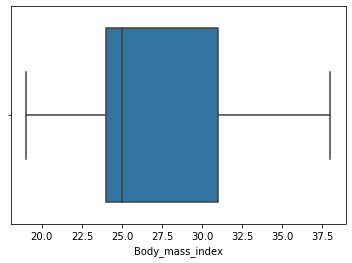

In [28]:
sns.boxplot(x=X['Body_mass_index'])

After studying the boxplots of our continuous variables, we can definitely see that the lower end outliers for Work_load_Average/day, Transportation_expense and Age that lie on 0 are most probably outliers caused due to data collection.

Now, we are going to use 2 techniques on outliers and missing values.

1. Dropping outliers and missing values
2. Imputing outliers and missing values

In [29]:
# Dropping method
# outlier detection (zscore method)
#Internally studentized method (z-score)
import numpy as np
from scipy import stats

def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(X, 'Work_load_Average/day')
print(outlier_z)

[573, 641]


In [30]:
print(X['Work_load_Average/day'][573])
print(X['Work_load_Average/day'][641])

12.0
0.0


In [31]:
outlier_z = z_score_method(X, 'Transportation_expense')
print(outlier_z)

[242]


In [32]:
print(X['Transportation_expense'][242])

0


In [33]:
outlier_z = z_score_method(X, 'Age')
print(outlier_z)

[200, 255, 376, 434, 521, 620, 622, 640]


In [34]:
print(X['Age'][outlier_z])

200     0
255    58
376     0
434    58
521    58
620    58
622    58
640    58
Name: Age, dtype: int32


In [35]:
# Age = 58, should not be dropped. So let's only drop age = 0
# Therefore the outlier row numbers are 573,641,242,200,376

In [36]:
# Missing values
X[X['Hit_target'].isnull()].index.tolist()

[531]

In [37]:
X[X['Weight'].isnull()].index.tolist()

[500, 576]

In [38]:
# however, weight can be manually computed as Height in metres * BMI
X['Weight'][500] = X['Body_mass_index'][500] * ((X['Height'][500]/100)**2)
X['Weight'][576] = X['Body_mass_index'][576] * ((X['Height'][576]/100)**2)

<ipython-input-38-5aeb7815d2e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weight'][500] = X['Body_mass_index'][500] * ((X['Height'][500]/100)**2)
<ipython-input-38-5aeb7815d2e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weight'][576] = X['Body_mass_index'][576] * ((X['Height'][576]/100)**2)


In [39]:
X['Weight'][500]

55.5579

In [40]:
# Therefore, the final rows to be dropped are: 573,641,242,200,376,531
dropping_rows = [573,641,242,200,376,531]
dropping_rows.sort()

In [41]:
dropping_rows

[200, 242, 376, 531, 573, 641]

In [42]:
X_unaltered = X.copy(deep=True)

In [43]:
X_drop = X.drop(dropping_rows)

In [44]:
# dropping equivalent rows in y
y_drop = y.drop(dropping_rows)

In [45]:
y_drop.shape

(660,)

In [46]:
X_drop.shape

(660, 19)

In [47]:
X.shape

(666, 19)

In [48]:
X_unaltered.shape

(666, 19)

Now let's try imputation instead.

Here we choose KNN imputation.
However, since it is scale sensitive, let us first normalize the data.

In [49]:
# Using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.928571,0.545455,0.25,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.304124,0.170213,0.607143,0.862069,0.632262,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.809314,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.461340,0.978723,0.607143,0.655172,0.632262,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.719072,0.000000,0.464286,0.672414,0.632262,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.237254,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947


In [50]:
# Repeating scaling on X_drop as well
X_drop_scaled = pd.DataFrame(scaler.fit_transform(X_drop), columns = X_drop.columns)
X_drop_scaled.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.809314,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.237254,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947


In [51]:
# Marking missing values and outliers
X_scaled.isna().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         1
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
dtype: int64

In [52]:
# Let's mark outliers as na too.
# For Work_load_Average/day ==> 573, 641
# Transportation_expense ==> 242
# Age ==> 200,376
X_scaled['Work_load_Average/day'][573] = np.NaN
X_scaled['Work_load_Average/day'][641] = np.NaN
X_scaled['Transportation_expense'][242] = np.NaN
X_scaled['Age'][200] = np.NaN
X_scaled['Age'][376] = np.NaN

In [53]:
X_scaled.isna().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             1
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                2
Work_load_Average/day              2
Hit_target                         1
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
dtype: int64

In [54]:
# Now begining KNN imputation on X_scaled
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_imputed_scaled = pd.DataFrame(imputer.fit_transform(X_scaled),columns = X_scaled.columns)

In [55]:
X_imputed_scaled.isna().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day              0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
dtype: int64

In [56]:
X_imputed_scaled.head(10)

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.928571,0.545455,0.25,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.304124,0.170213,0.607143,0.862069,0.632262,0.842105,1.0,0.000000,0.25,1.0,0.0,0.000,0.809314,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.461340,0.978723,0.607143,0.655172,0.632262,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.719072,0.000000,0.464286,0.672414,0.632262,0.842105,0.0,0.000000,0.50,1.0,1.0,0.000,0.237254,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.744845,0.659574,0.428571,0.568966,0.632262,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.656764,0.272727,0.578947
5,0.821429,0.545455,1.00,0.0,0.461340,0.978723,0.607143,0.655172,0.632262,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.637696,0.212121,0.631579
6,0.785714,0.545455,1.00,0.0,0.930412,1.000000,0.071429,0.482759,0.632262,0.842105,0.0,0.000000,0.25,1.0,0.0,0.500,0.466078,0.272727,0.421053
7,0.821429,0.545455,1.00,0.0,0.670103,0.957447,0.357143,0.620690,0.632262,0.842105,0.0,0.000000,1.00,1.0,0.0,0.000,0.180048,0.151515,0.210526
8,0.678571,0.545455,0.00,0.0,0.399485,0.148936,0.464286,0.586207,0.632262,0.842105,0.0,0.000000,0.50,1.0,0.0,0.000,0.752108,1.000000,0.315789
9,0.785714,0.545455,0.00,0.0,0.605670,0.127660,0.464286,0.637931,0.632262,0.842105,0.0,0.666667,0.25,0.0,0.0,0.125,0.618627,0.272727,0.526316
